In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if 'notebooks' in os.getcwd():
    os.chdir('..')

print(f'cwd: {os.getcwd()}')

cwd: /Users/gbemidebe/Documents/GitHub/RLseparation


In [3]:
# images folder
images_path = 'images/sensitivity'
if not os.path.exists(images_path):
    os.makedirs(images_path)

In [4]:
from scripts import NumericalModel
from scripts import simulate, MW_Cl, sensitivity_analysis
from scripts import visualize_sensitivity_data
import yaml

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.linewidth'] = 1.25 # sets linedwidth
mpl.rcParams['lines.markersize'] = 4 # sets marker-size on lines
mpl.rcParams['figure.dpi'] = 150 # sets dpi

plt.rcParams.update({
     "text.usetex": 1,
     "font.family": "serif",
     "font.sans-serif": ["Times"],
     "font.size": 15})

In [6]:
def molm32ppm(molm3, mw):
    """ convert mol/m3 to ppm """
    
    return (molm3 * mw / 1000) * 1000

SR: 0.5025311583681792
WR: 2.45406435480248
EC: 0.374873477360943 Wh/m^3
final Cdil: 17.022030509215423 mol/m^3, 603.4309815516867 ppm
final Cconc: 76.41552790176041 mol/m^3, 2708.9304641174067 ppm


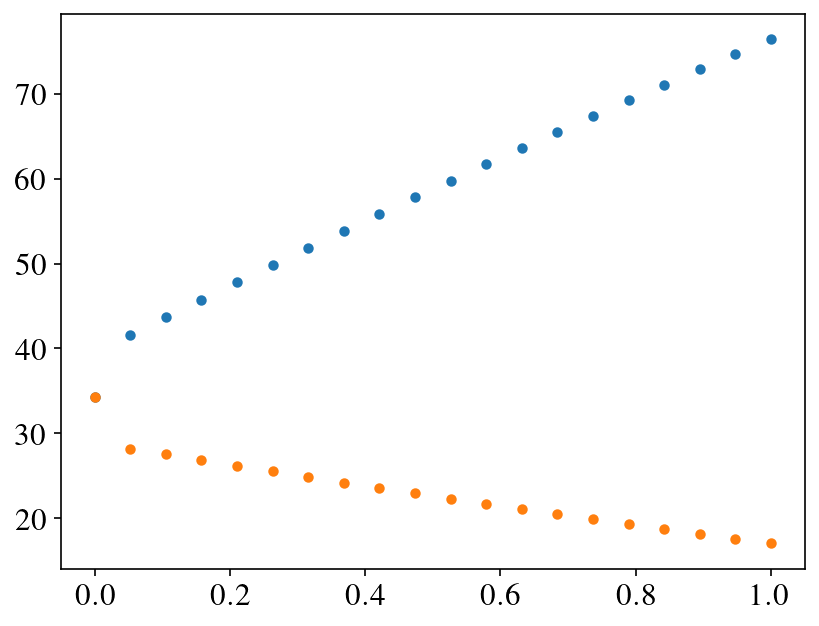

In [7]:
# activate the electrochemical model
model = NumericalModel(print_info=False)
# load the parameters and add
params = yaml.safe_load(open('scripts/params.yaml'))
model.set_params(params=params)
# compute the solution
result = simulate(model=model, dt=20)
print(f"SR: {result['SR']}")
print(f"WR: {result['WR']}")
print(f"EC: {result['EC']} Wh/m^3")
print(f"final Cdil: {result['Cdil_f']} mol/m^3, {molm32ppm(result['Cdil_f'], MW_Cl)} ppm")
print(f"final Cconc: {result['Cconc_f']} mol/m^3, {molm32ppm(result['Cconc_f'], MW_Cl)} ppm")


# plot the results
plt.scatter(result['times'], result['Cconc'], label='Cconc')
plt.scatter(result['times'], result['Cdil'], label='Cdil')

# Effect of Stacks count

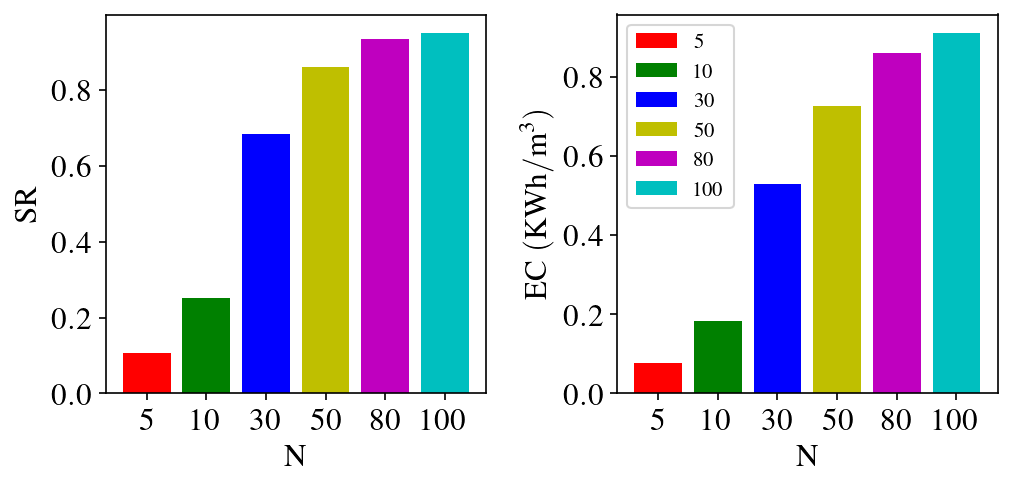

In [8]:
# the colors for the plot
colors = ['r', 'g', 'b', 'y', 'm', 'c']
# vary the N parameter
N_list = [5, 10, 30, 50, 80, 100]
# reset the model parameters
model.set_params(params=params)
N_SR_list, N_EC_list = sensitivity_analysis(model=model, parameters=params, var='N', var_list=N_list)
# plot the results bar
fig = visualize_sensitivity_data(SR_list=N_SR_list, EC_list=N_EC_list, var_list=N_list, colors=colors, var_name=r'$\rm N$',  figsize=(7, 3.5))
fig.savefig(f'{images_path}/sensitivity_N.png', dpi=300, bbox_inches='tight')

# Effect of voltage

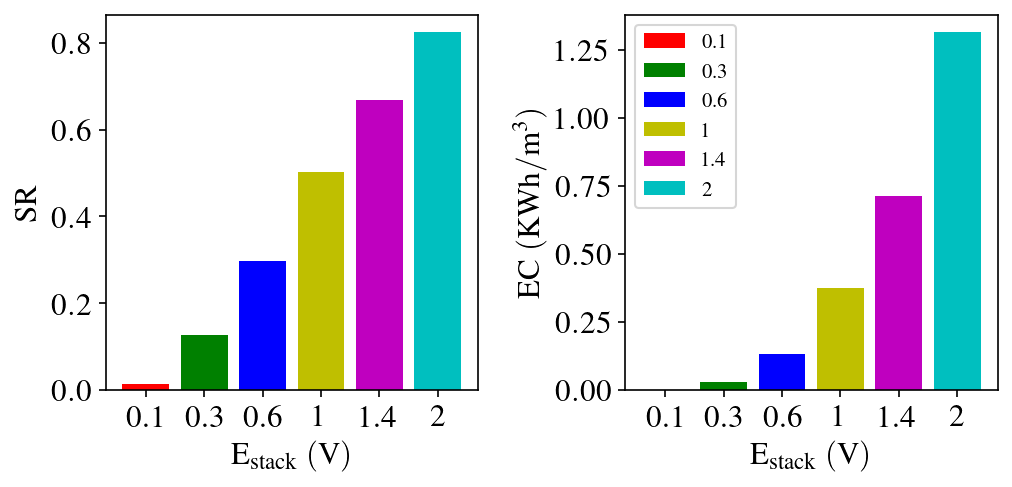

In [9]:
# parameter list
cell_voltage_list = [0.1, 0.3, 0.6, 1, 1.4, 2]
# compute the sensitivity analysis
model.set_params(params=params)
cell_voltage_SR_list, cell_voltage_EC_list = sensitivity_analysis(model=model, parameters=params, var='Estack', var_list=cell_voltage_list)
# plot the results bar
figV = visualize_sensitivity_data(SR_list=cell_voltage_SR_list, EC_list=cell_voltage_EC_list, var_list=cell_voltage_list, colors=colors, var_name=r'$\rm E_{stack} \ (V)$', figsize=(7, 3.5))
figV.savefig(f'{images_path}/sensitivity_Estack.png', dpi=300, bbox_inches='tight')

# Effect of the operational time


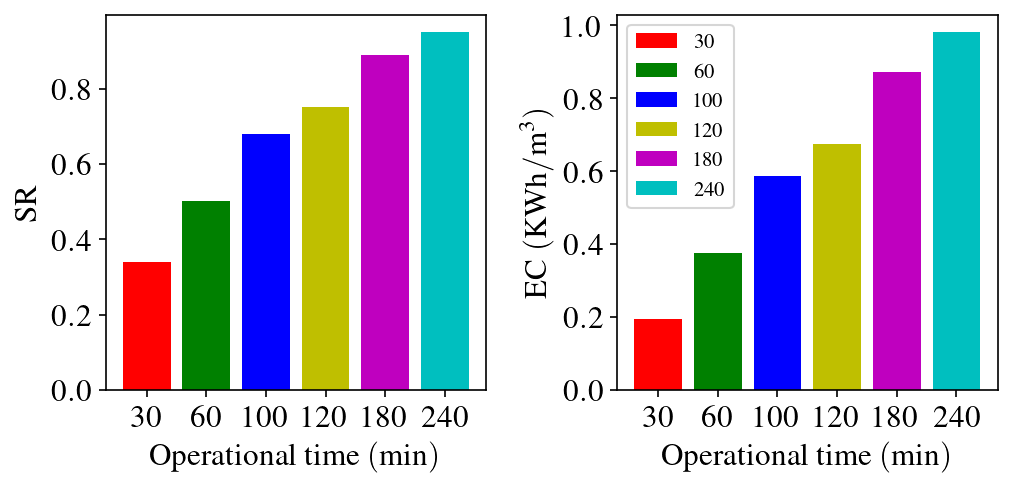

In [10]:
# parameter list
time_list = [30, 60, 100, 120, 180, 240] # 
# compute the sensitivity analysis
model.set_params(params=params)
time_SR_list, time_EC_list = sensitivity_analysis(model=model, parameters=params, var='T_tot', var_list=time_list)
# plot the results bar
figT = visualize_sensitivity_data(SR_list=time_SR_list, EC_list=time_EC_list, var_list=time_list, colors=colors, var_name=r'$\rm Operational \ {time} \ (min)$', figsize=(7, 3.5))
figT.savefig(f'{images_path}/sensitivity_Time.png', dpi=300, bbox_inches='tight')

# Effect of inlet feed concentration

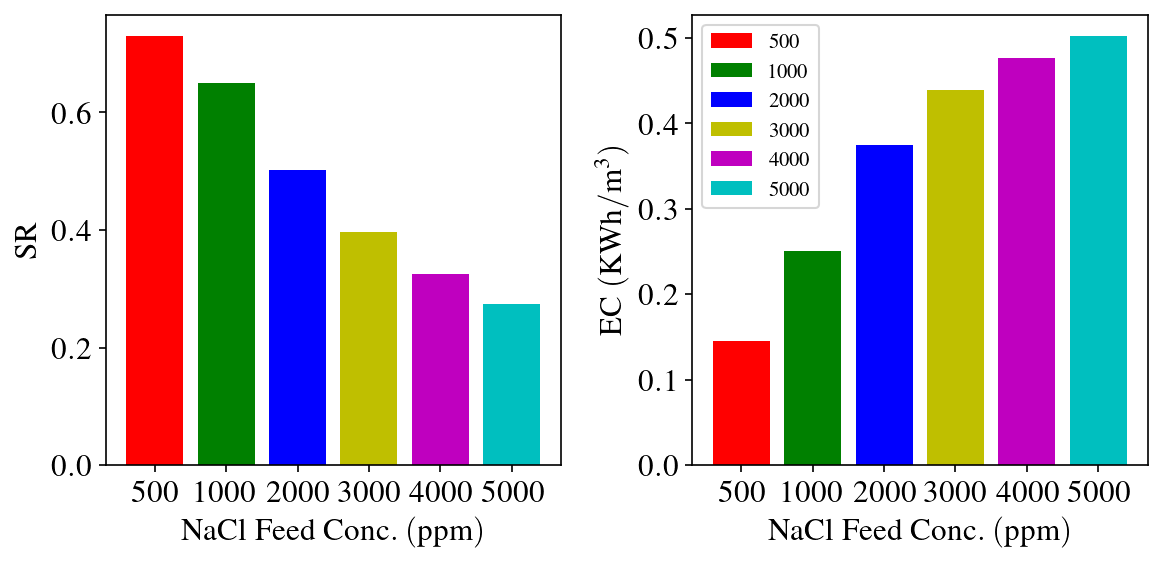

In [11]:
# parameter list
feed_list = [500, 1000, 2000, 3000, 4000, 5000] #
# compute the sensitivity analysis
model.set_params(params=params)
feed_SR_list, feed_EC_list = sensitivity_analysis(model=model, parameters=params, var='Feed', var_list=feed_list)
# plot the results bar
figFeed = visualize_sensitivity_data(SR_list=feed_SR_list, EC_list=feed_EC_list, var_list=feed_list, colors=colors, var_name=r'$\rm NaCl \ Feed \ Conc. \ (ppm)$', figsize=(8, 4))
figFeed.savefig(f'{images_path}/sensitivity_Feed.png', dpi=300, bbox_inches='tight')

# Effect of Diluate reservoir volume tank 

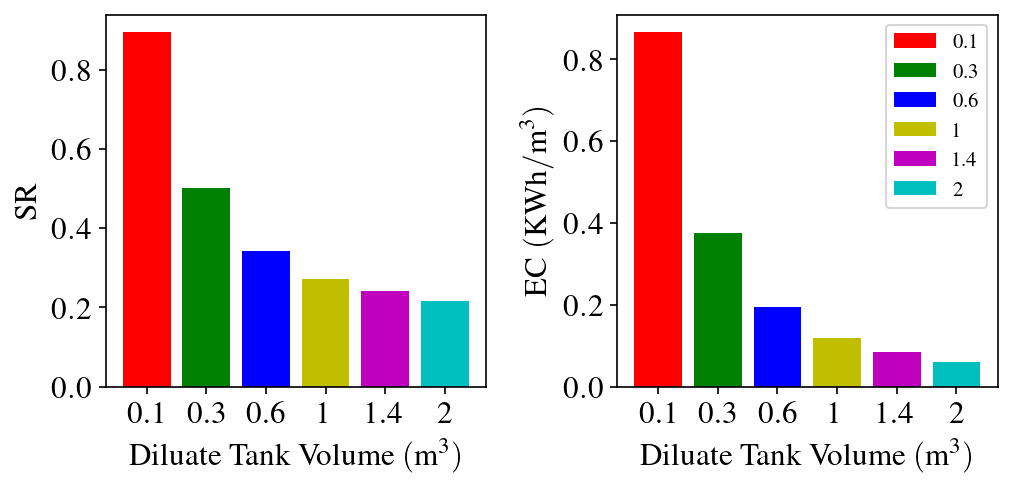

In [12]:
# parameter list
VT_dil_list = [0.1, 0.3, 0.6, 1, 1.4, 2] #
# compute the sensitivity analysis
model.set_params(params=params)
VT_dil_SR_list, VT_dil_EC_list = sensitivity_analysis(model=model, parameters=params, var='VT_dil', var_list=VT_dil_list)
# plot the results bar
figDilVT = visualize_sensitivity_data(SR_list=VT_dil_SR_list, EC_list=VT_dil_EC_list, var_list=VT_dil_list, colors=colors, var_name=r'$\rm Diluate \ Tank \ Volume \ (m^{3})$', figsize=(7, 3.5))
figDilVT.savefig(f'{images_path}/sensitivity_DilVT.png', dpi=300, bbox_inches='tight')

# Effect of Concentrate reservoir volume tank 

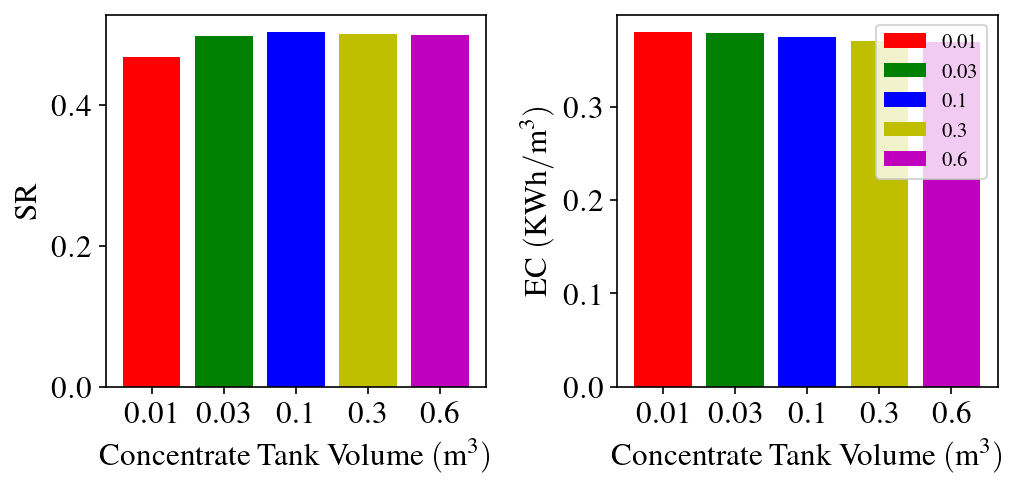

In [13]:
# parameter list
VT_conc_list = [0.01, 0.03, 0.1, 0.3, 0.6] #
# compute the sensitivity analysis
model.set_params(params=params)
VT_conc_SR_list, VT_conc_EC_list = sensitivity_analysis(model=model, parameters=params, var='VT_conc', var_list=VT_conc_list)
# plot the results bar
figConc_VT = visualize_sensitivity_data(SR_list=VT_conc_SR_list, EC_list=VT_conc_EC_list, var_list=VT_conc_list, colors=colors, var_name=r'$\rm Concentrate \ Tank \ Volume \ (m^{3})$', figsize=(7, 3.5))
figConc_VT.savefig(f'{images_path}/sensitivity_ConcVT.png', dpi=300, bbox_inches='tight')

In [14]:
import pandas as pd

# Initialize the DataFrame with the appropriate columns
data = pd.DataFrame(columns=['N', 'Estack', 'T_tot', 'Feed', 'VT_dil', 'VT_conc', 'SR', 'EC'])

# 1. Add N data and populate other columns with parameters
data_N = pd.DataFrame({
    'N': N_list,
    'Estack': [params['Estack']] * len(N_list),
    'T_tot': [params['T_tot']] * len(N_list),
    'Feed': [params['Feed']] * len(N_list),
    'VT_dil': [params['VT_dil']] * len(N_list),
    'VT_conc': [params['VT_conc']] * len(N_list),
    'SR': N_SR_list,
    'EC': N_EC_list
})

# 2. Add Estack data and populate other columns with parameters
data_Estack = pd.DataFrame({
    'N': [params['N']] * len(cell_voltage_list),
    'Estack': cell_voltage_list,
    'T_tot': [params['T_tot']] * len(cell_voltage_list),
    'Feed': [params['Feed']] * len(cell_voltage_list),
    'VT_dil': [params['VT_dil']] * len(cell_voltage_list),
    'VT_conc': [params['VT_conc']] * len(cell_voltage_list),
    'SR': cell_voltage_SR_list,
    'EC': cell_voltage_EC_list
})

# 3. Add T_tot data and populate other columns with parameters
data_T_tot = pd.DataFrame({
    'N': [params['N']] * len(time_list),
    'Estack': [params['Estack']] * len(time_list),
    'T_tot': time_list,
    'Feed': [params['Feed']] * len(time_list),
    'VT_dil': [params['VT_dil']] * len(time_list),
    'VT_conc': [params['VT_conc']] * len(time_list),
    'SR': time_SR_list,
    'EC': time_EC_list
})

# 4. Add Feed data and populate other columns with parameters
data_Feed = pd.DataFrame({
    'N': [params['N']] * len(feed_list),
    'Estack': [params['Estack']] * len(feed_list),
    'T_tot': [params['T_tot']] * len(feed_list),
    'Feed': feed_list,
    'VT_dil': [params['VT_dil']] * len(feed_list),
    'VT_conc': [params['VT_conc']] * len(feed_list),
    'SR': feed_SR_list,
    'EC': feed_EC_list
})

# 5. Add VT_dil data and populate other columns with parameters
data_VT_dil = pd.DataFrame({
    'N': [params['N']] * len(VT_dil_list),
    'Estack': [params['Estack']] * len(VT_dil_list),
    'T_tot': [params['T_tot']] * len(VT_dil_list),
    'Feed': [params['Feed']] * len(VT_dil_list),
    'VT_dil': VT_dil_list,
    'VT_conc': [params['VT_conc']] * len(VT_dil_list),
    'SR': VT_dil_SR_list,
    'EC': VT_dil_EC_list
})

# 6. Add VT_conc data and populate other columns with parameters
data_VT_conc = pd.DataFrame({
    'N': [params['N']] * len(VT_conc_list),
    'Estack': [params['Estack']] * len(VT_conc_list),
    'T_tot': [params['T_tot']] * len(VT_conc_list),
    'Feed': [params['Feed']] * len(VT_conc_list),
    'VT_dil': [params['VT_dil']] * len(VT_conc_list),
    'VT_conc': VT_conc_list,
    'SR': VT_conc_SR_list,
    'EC': VT_conc_EC_list
})

# Combine all DataFrames into the main DataFrame
data = pd.concat([data, data_N, data_Estack, data_T_tot, data_Feed, data_VT_dil, data_VT_conc], ignore_index=True)

# Display the DataFrame
data


/var/folders/83/j83q5_mj11956_7k9tnld0ym0000gn/T/ipykernel_78520/2677936072.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, data_N, data_Estack, data_T_tot, data_Feed, data_VT_dil, data_VT_conc], ignore_index=True)


,N,Estack,T_tot,Feed,VT_dil,VT_conc,SR,EC
0,5,1.0,60,2000,0.3,0.10,0.105612,0.075907
1,10,1.0,60,2000,0.3,0.10,0.251047,0.181988
2,30,1.0,60,2000,0.3,0.10,0.684270,0.530604
3,50,1.0,60,2000,0.3,0.10,0.862111,0.726798
4,80,1.0,60,2000,0.3,0.10,0.935337,0.861217
5,100,1.0,60,2000,0.3,0.10,0.951964,0.912465
6,20,0.1,60,2000,0.3,0.10,0.014068,0.001035
7,20,0.3,60,2000,0.3,0.10,0.127882,0.028153
8,20,0.6,60,2000,0.3,0.10,0.296552,0.131186
9,20,1.0,60,2000,0.3,0.10,0.502531,0.374873


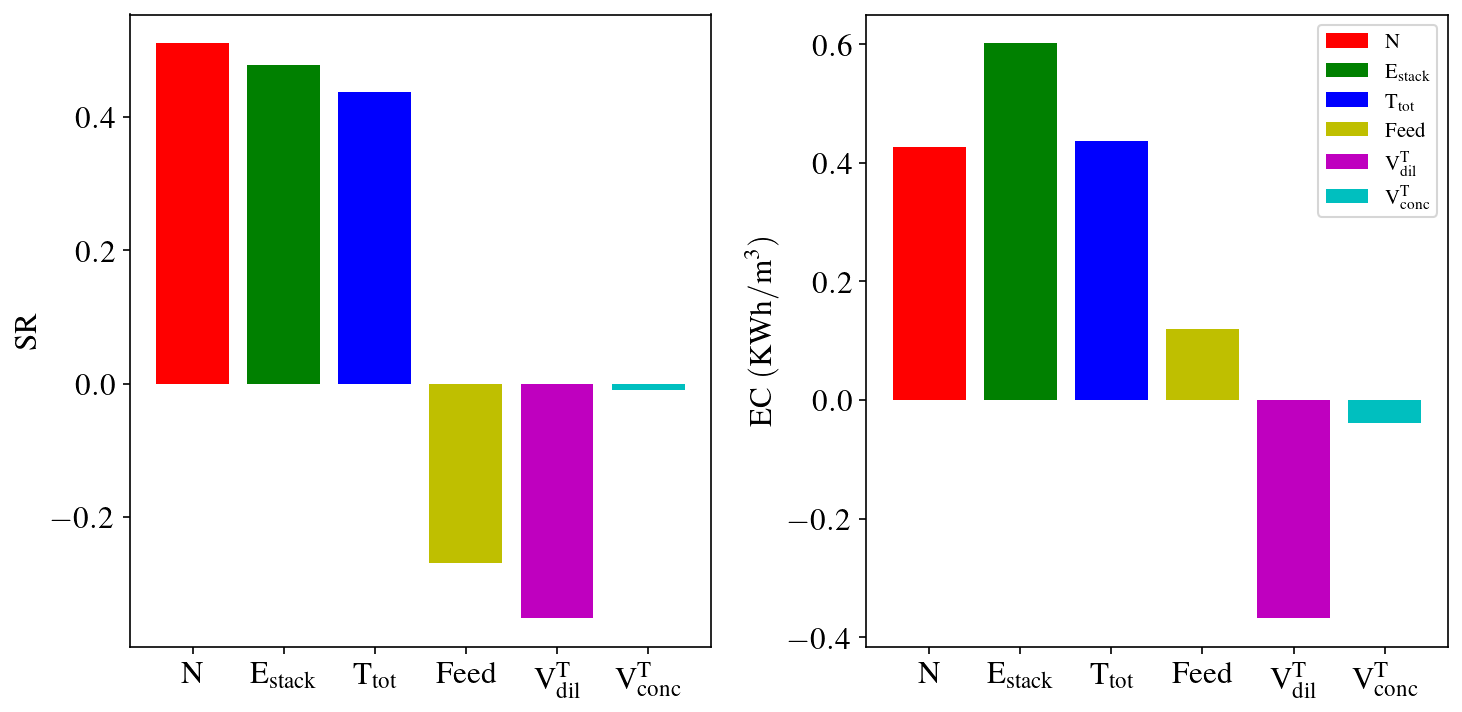

In [15]:
# compute the correlation matrix
corr = data.corr()
# get the correlation values
SR_corr_values = corr['SR'].drop(['SR', 'EC'])
EC_corr_values = corr['EC'].drop(['SR', 'EC'])
parameters = [r'$\rm N$', r'$\rm E_{stack}$', r'$\rm T_{tot}$', r'$\rm Feed$', r'$\rm V^{T}_{dil}$', r'$\rm V^{T}_{conc}$']
# plot with 
fig_corr = visualize_sensitivity_data(
    SR_list=SR_corr_values.values, EC_list=EC_corr_values.values, 
    var_list=parameters, colors=colors, 
    var_name='')

fig_corr.savefig(f'{images_path}/correlation.png', dpi=300, bbox_inches='tight')